# Notebook

Backup notebook to ensure saving of certain variables can be tested.

In [1]:
%load_ext autoreload
%autoreload 2
from main import run_experiment
from collections import Counter
import pickle
import pandas as pd

## Relevant feature detection

In [111]:
student, env, results = run_experiment(num_games=2, get_context=True)

  0%|          | 0/2 [00:00<?, ?it/s]

['X', 'O', 3, 4, 'O', 6, 7, 'X', 'X']
1
Error: Move already taken


100%|██████████| 2/2 [03:02<00:00, 91.23s/it]


In [112]:
print(student.stats)

{'top_features': {('X', 2, 3, 4, 5, 6, 7, 8, 9): [FeatureActivations(
   0: (Feature("Small positive integers (1-23) in code and data structures"), 2.140625)
   1: (Feature("Activation on the numeral 5, especially in scientific contexts"), 2.03125)
   2: (Feature("The model's turn to respond in ASCII-based games"), 1.359375)
   3: (Feature("May dates in SQL queries"), 1.328125)
   4: (Feature("Numerical patterns and sequences in structured data"), 1.296875)
)], ('X', 2, 3, 4, 'O', 6, 7, 8, 'X'): [FeatureActivations(
   0: (Feature("Representation of the number 2 or second position"), 3.765625)
   1: (Feature("The model's turn to respond in ASCII-based games"), 1.375)
   2: (Feature("Detection of the numeral 2"), 1.2109375)
   3: (Feature("Grid-based representations in games and visual patterns"), 1.0546875)
   4: (Feature("Numbered list items in language processing tasks"), 0.875)
)], ('X', 'O', 3, 4, 'O', 6, 7, 'X', 'X'): [FeatureActivations(
   0: (Feature("The number 4"), 2.09375)
 

In [113]:
# Combine all lists into one
state_features = []
for key in student.stats['top_features']:
    state_features += student.stats['top_features'][key]

all_features = []
for i in range(len(state_features)):
    all_features += state_features[i]
    
feature_values = []
for feature in all_features:
    feature_values.append(feature.feature)

feature_counts = Counter(feature_values)
print(feature_counts)

Counter({Feature("The model's turn to respond in ASCII-based games"): 6, Feature("Small positive integers (1-23) in code and data structures"): 3, Feature("Activation on the numeral 5, especially in scientific contexts"): 2, Feature("May dates in SQL queries"): 2, Feature("Numerical patterns and sequences in structured data"): 2, Feature("Representation of the number 2 or second position"): 2, Feature("Detection of the numeral 2"): 2, Feature("Grid-based representations in games and visual patterns"): 2, Feature("Numbered list items in language processing tasks"): 2, Feature("The number 4"): 1, Feature("Small to medium numbers in structured lists or game results"): 1, Feature("ASCII art vertical lines and forward slashes"): 1, Feature("The model should complete a code snippet for a simple game implementation"): 1, Feature("The number 6 in sequences or lists"): 1, Feature("Small integer and decimal representation"): 1, Feature("Sequential number listing activation"): 1, Feature("ASCII a

In [45]:
# Save the results
with open('output/results.pkl', 'wb') as f:
    pickle.dump(feature_counts, f)

# Human readable results
df = pd.DataFrame.from_dict(feature_counts, orient='index')
df.to_csv('output/results.csv')

In [41]:
# load the results
with open('output/results.pkl', 'rb') as f:
    test_results = pickle.load(f)
    
print(test_results)

Counter({Feature("Small positive integers (1-23) in code and data structures"): 4, Feature("Numerical patterns and sequences in structured data"): 2, Feature("Sequences or groups of consecutive numbers"): 2, Feature("Sequential number listing activation"): 2, Feature("Activation on the numeral 5, especially in scientific contexts"): 1, Feature("The model's turn to respond in ASCII-based games"): 1, Feature("May dates in SQL queries"): 1, Feature("Numbers ending in 8 in sequential lists"): 1, Feature("The number 8 in technical or quantitative contexts"): 1, Feature("The number 6 in sequences or lists"): 1, Feature("Small integer and decimal representation"): 1, Feature("ASCII art structural elements (vertical lines and box-drawing characters)"): 1, Feature("Small to medium numbers in structured lists or game results"): 1, Feature("The number 7"): 1})


## Determining base success rate

In [22]:
student_base, env_base, results_base = run_experiment(num_games=100, get_context=False)
print(results_base)
print(student_base.stats)

100%|██████████| 100/100 [17:25<00:00, 10.45s/it]

{'X': 99, 'O': 0, 'Draw': 1}
{'top_features': {}, 'move_5': 88, 'step': 588, 'move_8': 48, 'move_7': 34, 'move_2': 57, 'invalid_move': 21, 'fail_safe': 21, 'move_9': 15, 'move_6': 32, 'move_4': 7, 'move_3': 6, 'move_1': 7}


We define success as winning or drawing. Of course, the tic-tac-toe optimal agent cannot lose, so we only need to look at the draw rate.

## SAE RL

In [96]:
# Sanity checker
from stable_baselines3.common.env_checker import check_env
from tictactoe import TicTacToeSAE
from move_checker import MoveChecker
from agents import OptimalAgent
from constants import TEACHER

move_checker = MoveChecker()
optimal_agent = OptimalAgent(TEACHER, move_checker)

env = TicTacToeSAE(move_checker=move_checker, teacher=optimal_agent)

check_env(env)

               
   ]      
Error: Could not extract move from text
 u v u • u s u
 u s u u u u
 u s a u a s u u u u u
Error: Could not extract move from text
DEefe FragspinnerDEunistefe zastavilderefeDE ectefe=_('ancellationTokenfikefeFragmentefe/preferencesizoefe宿DEDEDE
Error: Could not extract move from text
['O', 'O', 'X', 'X', 'X', 6, 7, 8, 9]
1
Error: Move already taken
asting your tackled
 avoidance
 
*** 
 them

 


 

 
 

  


Error: Could not extract move from text
ixingtinoinoerINO WyninoinoinoinoinoinoinoawahccessINOinoffiinoinoетомinoinoinoino
Error: Could not extract move from text
['X', 2, 3, 4, 5, 6, 7, 8, 9]
0
Error: Move already taken
   Reply safe \
 Marino  _s s anal mlad <![  banker   ]   Reply   
Error: Could not extract move from text
 three
 timeline
 advancingenencestor
oorhn variety credit
 trio

oorroor]ooroor troputhuth
Error: Could not extract move from text


In [ ]:
# This might crash
student_rl, env_rl, results_rl = run_experiment(num_games=3000, get_context=False, use_rl_agent=True, test_agent=False) # num_games is really num steps in this case

In [7]:
print(results_rl)

{'X': 8, 'O': 0, 'Draw': 0}


## Testing Agent

In [3]:
student_test, env_test, results_test = run_experiment(num_games=100, get_context=False, use_rl_agent=True, test_agent=True)

Bound: 0.2
Loading trained model from disk
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


 83%|████████▎ | 83/100 [13:59<05:03, 17.85s/it]

Draw


100%|██████████| 100/100 [16:20<00:00,  9.80s/it]


In [4]:
print(results_test)

{'X': 99, 'O': 0, 'Draw': 1}


In [5]:
# Look at everything except activations key
for key in env_test.stats.keys():
    if key != 'activations':
        print(key, env_test.stats[key])
        
print("Step", student_test.stats['step'])

move_5 94
move_7 31
move_4 9
move_8 44
move_2 46
move_6 30
invalid_move 21
fail_safe 10
move_9 13
move_3 3
move_1 2
Step 272


In [6]:
pickle.dump(env_test.stats['activations'], open('output/features.pkl', 'wb'))

## Plots

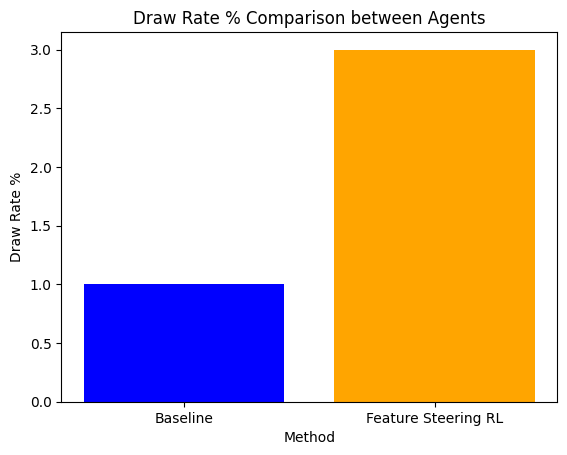

In [48]:
import matplotlib.pyplot as plt

# Data
best_results = {
    'Baseline': 1,
    'Feature Steering RL': 3,
}

# Create the bar plot
fig, ax = plt.subplots()
ax.bar(best_results.keys(), best_results.values(), color=['blue', 'orange'])

# Set the title and labels
ax.set_title('Draw Rate % Comparison between Agents')
ax.set_xlabel('Method')
ax.set_ylabel('Draw Rate %')

# Enable the grid
#ax.grid(True)

# Show the plot
plt.show()